# Extracting data from the HDF5 file

Here we will extract some of the LIGO experiment's actual data from the HDF5 file and visualize it.

To do so, we will first explore the HDF5 group `'strain'`, which contains the time-series data from the detector.

In [2]:
#Importing packages
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os

# Confirm the file is in the working directory
print("Working Directory:", os.getcwd())
print("Files:", os.listdir())

# Load the HDF5 file and examine the structure
with h5py.File('../data/LIGO_data.hdf5', 'r') as data:
    print("Top-level groups:")
    for key in data.keys():
        print(" -", key)

    strain_group = data['strain']
    print("\nKeys inside 'strain' group:")
    for key in strain_group.keys():
        print(" -", key)

    # Extract strain data
    strain = np.array(strain_group['Strain'])

Working Directory: c:\Users\AMano\ligo-strain-visualizer\notebooks
Files: ['01_visualize_strain.ipynb']
Top-level groups:
 - meta
 - quality
 - strain

Keys inside 'strain' group:
 - Strain


# Plotting the raw LIGO strain data

Let us now plot a short segment of the raw LIGO signal to understand the nature of the data.


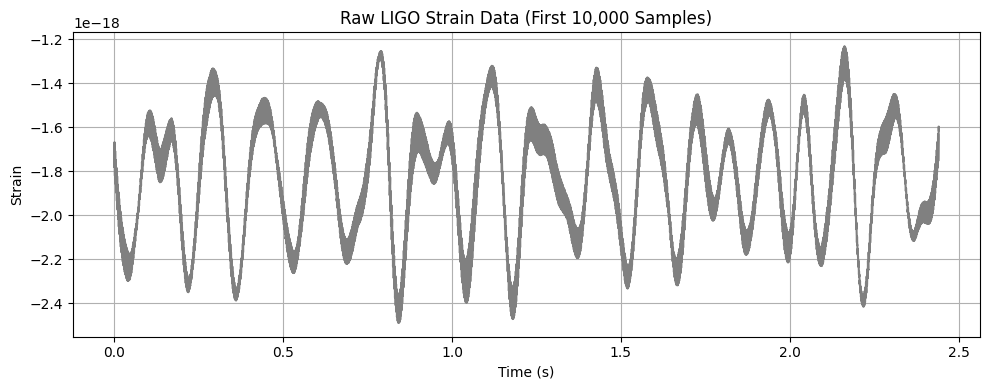

In [ ]:
# Define sampling rate and create a time vector
fs = 4096  # Hz
num_samples = 10000
time = np.linspace(0, num_samples / fs, num_samples)

# Plot raw strain signal
plt.figure(figsize=(10, 4))
plt.plot(time, strain[:num_samples], color='gray')
plt.title('Raw LIGO Strain Data (First 10,000 Samples)')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.grid(True)
plt.tight_layout()
plt.show()

# Applying a bandpass filter

We apply a bandpass filter between 20 Hz and 300 Hz to clean up the signal and remove low-frequency drift and high-frequency noise.

This is a typical preprocessing step in gravitational wave signal analysis.


In [ ]:
from scipy.signal import butter, filtfilt

# Define a bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Filter the strain signal
filtered_strain = bandpass_filter(strain, 20, 300, fs)

# Comparing raw vs filtered strain signals

Let us now plot both the raw and filtered strain signals to observe the effect of the bandpass filter.

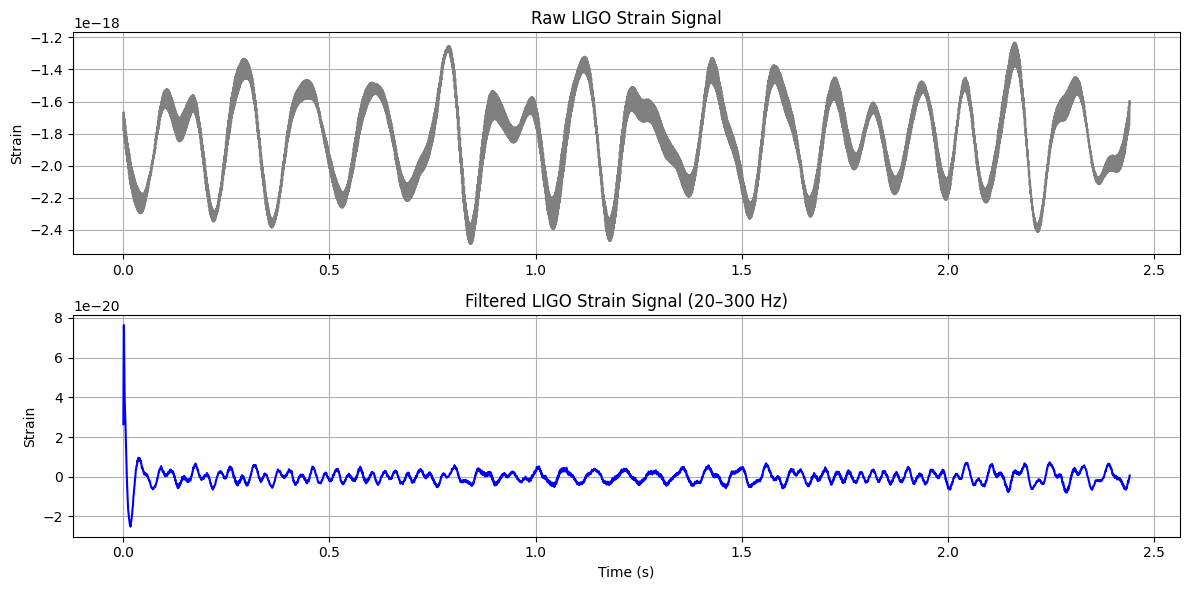

In [ ]:
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(time, strain[:num_samples], color='gray')
plt.title('Raw LIGO Strain Signal')
plt.ylabel('Strain')
plt.grid(True)

# Filtered signal
plt.subplot(2, 1, 2)
plt.plot(time, filtered_strain[:num_samples], color='blue')
plt.title('Filtered LIGO Strain Signal (20–300 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualizing frequency content with FFT

To better understand the signal’s frequency characteristics, we compute its Fast Fourier Transform (FFT) and plot the frequency spectrum.

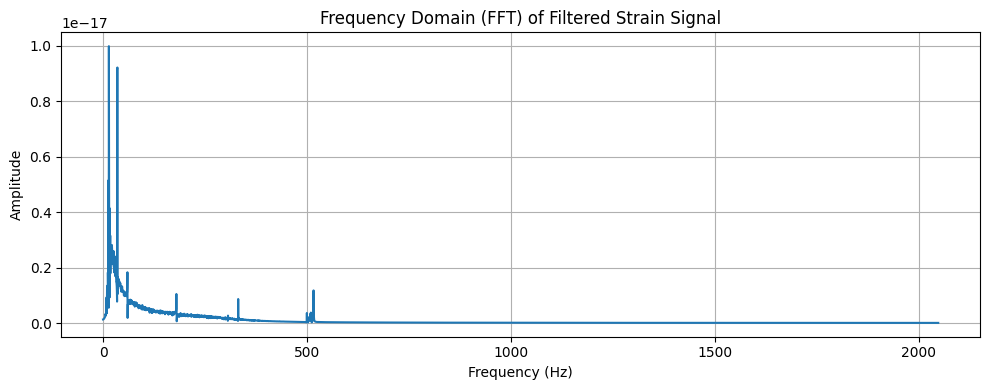

In [ ]:
from scipy.fft import fft, fftfreq

N = num_samples
yf = fft(filtered_strain[:N])
xf = fftfreq(N, 1 / fs)

plt.figure(figsize=(10, 4))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))
plt.title("Frequency Domain (FFT) of Filtered Strain Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()
